<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Introduction to Probability Distribution**


Estimated time needed: **30** minutes


In this lab, you will familiarize yourself with the normal probability distributions and work on some exercises


## Objectives


*   Import Libraries
*   Introduction to Probability Distributions
    *   Normal Distributions
*   Lab Exercises


***


## Import Libraries


All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. If you run this notebook in a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.


In [1]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install matplotlib=3.4.3-y
#!  mamba install statsmodels=0.12.0-y


Import the libraries we need for the lab


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt

Read in the csv file from the url using the request library


In [3]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df = pd.read_csv(ratings_url)

## Introduction to Probability Distribution


In this section, you will learn how to create the plot distributions using the scipy library in python


### Normal Distribution


A normal distribution is a bell-shaped density curve described by its mean μ and standard deviation σ. The curve is symmetrical and centered around it's mean. A normal distribution curve looks like this:


![image.png](attachment\:image.png)


We can visualize the curve. Import norm from scipy.stat and plot graph with matplotlib


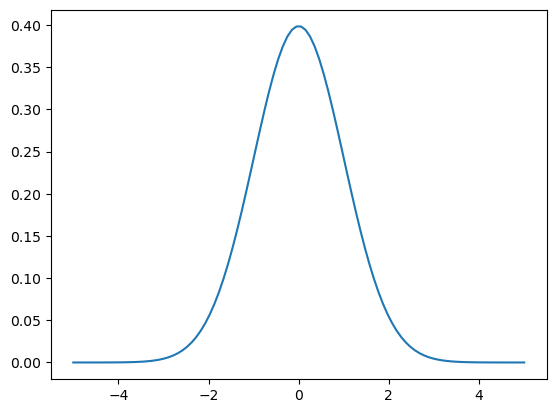

In [8]:
import scipy.stats as stats

x_axis = np.linspace(-5, 5, 100)
y_axis = stats.norm.pdf(x_axis, 0, 1)

plt.plot(x_axis, y_axis)
plt.show()



## Lab Exercises


### Using the teachers' rating dataset, what is the probability of receiving an evaluation score of greater than 4.5


Find the mean and standard deviation of teachers' evaluation scores


In [11]:
eval_mean = round(ratings_df['eval'].mean(), 3)
eval_sd = round(ratings_df['eval'].std(), 3)
print(eval_mean, eval_sd)

3.998 0.555


Use the scipy.stats module. Because python only looks to the left i.e. less than, we do remove the probability from 1 to get the other side of the tail


In [12]:
prob0 = scipy.stats.norm.cdf((4.5 - eval_mean)/eval_sd)
print(1 - prob0)

0.1828639734596742


### Using the teachers' rating dataset, what is the probability of receiving an evaluation score greater than 3.5 and less than 4.2


First we find the probability of getting evaluation scores less than 3.5 using the <code>norm.cdf</code> function


In [13]:
x1 = 3.5
prob1 = scipy.stats.norm.cdf((x1 - eval_mean)/eval_sd)
print(prob1)

0.1847801491443654


Then for less than 4.2


In [14]:
x2 = 4.2
prob2 = scipy.stats.norm.cdf((x2 - eval_mean)/eval_sd)
print(prob2)

0.642057540461896


The probability of a teacher receiving an evaluation score that is between 3.5 and 4.2 is:


In [15]:
round((prob2 - prob1)*100, 1)

45.7

### Using the two-tailed test from a normal distribution:

*   A professional  basketball  team wants to compare its performance with  that of players  in a regional league.
*   The pros are known to have a historic mean of 12 points  per game with  a standard  deviation  of 5.5.
*   A group  of 36 regional players recorded on average 10.7 points  per game.
*   The pro coach would like to know whether  his professional  team scores on average are different from that of the regional players.


State the null hypothesis

*   $H\_0$: $x = µ\_1$ ("The mean point of the regional players is not different from the historic mean")
*   $H\_1$: $x ≠ µ\_1$ ("The mean point of the regional players is different from the historic mean")


When the population standard deviation is given and we are asked to deal with a sub-sample, the size (n) of the sub-sample is used in the formula:
![image.png](attachment\:image.png)


In [16]:
## because it is a two-tailed test we multiply by 2
2*round(scipy.stats.norm.cdf((10.7 - 12)/(5.5/sqrt(36))), 3)

0.156

**Conclusion:** Because the p-value is greater than 0.05, we fail  to reject the null hypothesis as there is no sufficient evidence to prove that the mean point of the regional players is different from the historic mean


## Practice Questions


### Question 1: Using the teachers' rating dataset, what is the probability of receiving an evaluation score greater than 3.3?


In [33]:
## insert code here
eval_mean = ratings_df['eval'].mean()
eval_sd = ratings_df['eval'].std()
prob_lessthan_3 = scipy.stats.norm.cdf((3.3 - mean)/sd)
round((1 - prob_lessthan_3),3)

0.896

### Question 2: Using the teachers' rating dataset, what is the probability of receiving an evaluation score between 2 and 3?


In [43]:
x1 = 2
x2 = 3
prob_less_than_2 = scipy.stats.norm.cdf((x1 - eval_mean)/eval_sd)
print('The probability of getting a score less than 2 is', prob_less_than_2)

prob_less_than_3 = scipy.stats.norm.cdf((x2 - eval_mean)/eval_sd)
print('The probability of getting a score less than 3 is', round((prob_less_than_3),3))
print('The probability of getting a score between 2 and 3 is', round((prob_less_than_3 - prob_less_than_2),3))

The probability of getting a score less than 2 is 0.00015827682959173475
The probability of getting a score less than 3 is 0.036
The probability of getting a score between 2 and 3 is 0.036


### Question 3: To test the hypothesis that sleeping for at least 8 hours makes one smarter, 12 people who have slept for at least 8 hours every day  for the past one year  have their IQ tested.

*   Here are the results: 116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92
*   Test using the following hypotheses: H0: μ = 100 or Ha: μ > 100


In [49]:
## insert code here
iq_list = [116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92]
iq_mean = np.mean(Iq_list)
iq_sd = np.std(Iq_list)
number_of_sample = len(Iq_list)
print('The mean of the IQ scores is', mean)
print('The standard deviation of the IQ scores is', sd)
prob = 1-scipy.stats.norm.cdf((iq_mean - 100)/(iq_sd/sqrt(number_of_sample)))
print('The probability of getting a score greater than 100 is', round(prob,3))

The mean of the IQ scores is 106.0
The standard deviation of the IQ scores is 8.455767262643882
The probability of getting a score greater than 100 is 0.007


## Authors


[Aije Egwaikhide](https://www.linkedin.com/in/aije-egwaikhide/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2021-01-01) is a Data Scientist at IBM who holds a degree in Economics and Statistics from the University of Manitoba and a Post-grad in Business Analytics from St. Lawrence College, Kingston. She is a current employee of IBM where she started as a Junior Data Scientist at the Global Business Services (GBS) in 2018. Her main role was making meaning out of data for their Oil and Gas clients through basic statistics and advanced Machine Learning algorithms. The highlight of her time in GBS was creating a customized end-to-end Machine learning and Statistics solution on optimizing operations in the Oil and Gas wells. She moved to the Cognitive Systems Group as a Senior Data Scientist where she will be providing the team with actionable insights using Data Science techniques and further improve processes through building machine learning solutions. She recently joined the IBM Developer Skills Network group where she brings her real-world experience to the courses she creates.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                     |
| ----------------- | ------- | --------------- | -------------------------------------- |
| 2020-08-14        | 0.1     | Aije Egwaikhide | Created the initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2021-01-01).
